# 作業 : 實做向量拼接方式 ATTENTION

# [作業目標]
- 實做向量拼接方式 ATTENTION
- 運用 實做的 ATTENTION FUNCTION 在之前的 RNN seq 2 seq attention

# [作業重點]
向量拼接方式 ATTENTION
- 先將 q and k concat 起來
- 然後經過一層 W attention 自學參數,
- 和一個 tanh activation function. 
- 最後乘以一個 Vt 調整成一個同等於input seq 的數列.
- 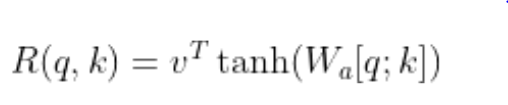

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
# 請在這邊實做向量拼接方式 ATTENTION 
class Attention(nn.Module):
    def __init__(self, enc_hid_dim, dec_hid_dim):
        super().__init__()
        
        self.attn = nn.Linear((enc_hid_dim * 2) + dec_hid_dim, dec_hid_dim)
        self.v = nn.Linear(dec_hid_dim, 1, bias = False)
        
    def forward(self, hidden, encoder_outputs, mask):
        
        #hidden = [batch size, dec hid dim]
        #encoder_outputs = [src len, batch size, enc hid dim * 2]
        
        batch_size = encoder_outputs.shape[1]
        src_len = encoder_outputs.shape[0]
        
        #repeat decoder hidden state src_len times
        # 這邊開始，同學可以跟隨我們的建議 完成程式 或是自行寫作
        # 整理代表 q and k 的 hidden and encoder_output 
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
  
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        
        #hidden = [batch size, src len, dec hid dim]
        #encoder_outputs = [batch size, src len, enc hid dim * 2]
        
        # 計算 向量拼接方式 ATTENTION
        # 先將 q and k concat 起來
        # 然後經過一層 W attention 自學參數,
        # 和一個 tanh activation function.
        # 最後乘以一個 Vt 調整成一個同等於input seq 的數列.
        attention = torch.cat([hidden, encoder_outputs], dim=2)
        attention = torch.tanh(self.attn(attention))
        
        #attention = [batch size, src len, dec hid dim]
        # 將 ATTENTION 結果乘以 V
        attention = self.v(attention).squeeze()
        
        #attention = [batch size, src len]
        # apply MASK 建議使用 tensor 的 masked_fill 
        attention = attention.masked_fill(mask == 0, -1e10)
        
        return F.softmax(attention, dim = 1)